<a href="https://colab.research.google.com/github/nrally1/AIPS/blob/main/Audio%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Archive:  26_29_09_2017_KCL.zip
   creating: 26-29_09_2017_KCL/ReadText/
   creating: 26-29_09_2017_KCL/ReadText/HC/
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID00_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID01_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID03_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID05_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID08_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID10_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID11_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID12_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID14_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID15_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID19_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID21_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID22_hc_0_0_0.wav  
  inflating: 26-29_09_2017_KCL/ReadText/HC/ID23_hc_0_0_0.wav  
 

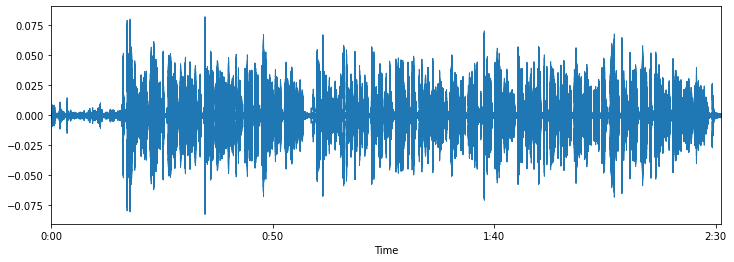

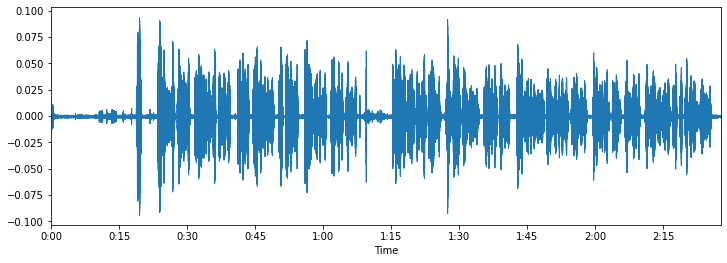

In [15]:
import tensorflow as tf
import fastai
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import keras
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import zipfile
import os
import shutil
!pip install Django==3.2.6
import matplotlib.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from matplotlib import pyplot
! pip install librosa
import librosa
! pip install pydub
from pydub import AudioSegment
import librosa.display

files.upload()

! unzip 26_29_09_2017_KCL.zip

training = '/content/26-29_09_2017_KCL/ReadText/PD'

data, sampling_rate = librosa.load('/content/26-29_09_2017_KCL/ReadText/HC/ID00_hc_0_0_0.wav')

! mkdir /content/26-29_09_2017_KCL/ReadText/train

! mkdir /content/26-29_09_2017_KCL/ReadText/testing

dataparkinson, sampling_rateparkinson = librosa.load('/content/26-29_09_2017_KCL/ReadText/PD/ID07_pd_2_0_0.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

plt.figure(figsize=(12, 4))

place = "/content/26-29_09_2017_KCL/ReadText/train"

shows = '/content/26-29_09_2017_KCL/ReadText/testing'

! mkdir /content/26-29_09_2017_KCL/ReadText/train/healthy

! mkdir /content/26-29_09_2017_KCL/ReadText/testing/parkinson

! mkdir /content/26-29_09_2017_KCL/ReadText/testing/healthy

! mkdir /content/26-29_09_2017_KCL/ReadText/train/parkinson

librosa.display.waveplot(dataparkinson, sr=sampling_rateparkinson)



In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
healthy = "HC PD".split()
print("/content/26-29_09_2017_KCL/ReadText/")
for s in healthy:
    for filename in os.listdir(f'/content/26-29_09_2017_KCL/ReadText/{s}'):
      if filename == ".ipynb_checkpoints":
          pass
      else:
        if np.random.rand(1) < 0.2:
          print(filename)
          loads = f'/content/26-29_09_2017_KCL/ReadText/{s}/{filename}'
          if filename == ".ipynb_checkpoints":
            pass
          else:
            y, sr = librosa.load(loads, mono=True, offset = 30, duration=50)
            x, sq = librosa.load(loads, mono=True, offset = 10, duration=50)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            for i in list("hello"):
              x, sq = librosa.load(loads, mono=True, offset = int(np.random.rand(1) * 100), duration=50)
              plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
              plt.axis('off')
              if list(filename)[5] == "p":
                print(filename)
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/parkinson/{filename}.png')
              else:
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/healthy/{filename}.png')
            for i in list("hello"):
              x, sq = librosa.load(loads, mono=True, offset = int(np.random.rand(1) * 100), duration=50)
              plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
              plt.axis('off')
              if list(filename)[5] == "p":
                print(filename)
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/parkinson/{filename}ea.png')
              else:
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/healthy/{filename}ea.png')
            x, sq = librosa.load(loads, mono=True, offset = 20, duration=50)
            plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            if list(filename)[5] == "p":
              print(filename)
              plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/parkinson/{filename}eas.png')
            else:
              plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/testing/healthy/{filename}eas.png')
            plt.clf()
        else:
          if filename == ".ipynb_checkpoints":
              pass
          else:
            loads = f'/content/26-29_09_2017_KCL/ReadText/{s}/{filename}'
            y, sr = librosa.load(loads, mono=True, offset = 30, duration=50)
            x, sq = librosa.load(loads, mono=True, offset = 10, duration=50)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            for i in list("hello"):
              x, sq = librosa.load(loads, mono=True, offset = int(np.random.rand(1) * 100), duration=50)
              if list(filename)[5] == "h":
                print(filename)
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/healthy/{filename}.png')
              else:
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/parkinson/{filename}.png')
            plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            for i in list("hello"):
              x, sq = librosa.load(loads, mono=True, offset = int(np.random.rand(1) * 100), duration=50)
              if list(filename)[5] == "p":
                print(filename)
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/parkinson/{filename}ea.png')
              else:
                plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/healthy/{filename}ea.png')
            x, sq = librosa.load(loads, mono=True, offset = 20, duration=50)
            plt.specgram(x, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            if list(filename)[5] == "p":
              print(filename)
              plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/parkinson/{filename}eas.png')
            else:
              plt.savefig(f'/content/26-29_09_2017_KCL/ReadText/train/healthy/{filename}eas.png')
            plt.clf()



/content/26-29_09_2017_KCL/ReadText/
ID14_hc_0_0_0.wav
ID31_hc_0_1_1.wav
ID31_hc_0_1_1.wav
ID31_hc_0_1_1.wav
ID31_hc_0_1_1.wav
ID31_hc_0_1_1.wav
ID25_hc_0_0_0.wav
ID25_hc_0_0_0.wav
ID25_hc_0_0_0.wav
ID25_hc_0_0_0.wav
ID25_hc_0_0_0.wav
ID36_hc_0_0_0.wav
ID36_hc_0_0_0.wav
ID36_hc_0_0_0.wav
ID36_hc_0_0_0.wav
ID36_hc_0_0_0.wav
ID21_hc_0_0_0.wav
ID21_hc_0_0_0.wav
ID21_hc_0_0_0.wav
ID21_hc_0_0_0.wav
ID21_hc_0_0_0.wav
ID00_hc_0_0_0.wav
ID22_hc_0_0_0.wav
ID22_hc_0_0_0.wav
ID22_hc_0_0_0.wav
ID22_hc_0_0_0.wav
ID22_hc_0_0_0.wav
ID05_hc_0_0_0.wav
ID08_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID12_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID11_hc_0_0_0.wav
ID03_hc_0_0_0.wav


In [25]:

for s in os.listdir('/content/26-29_09_2017_KCL/ReadText/testing/healthy'):
  if s == ".ipynb_checkpoints":
    pass
  else:
    os.remove(f'/content/26-29_09_2017_KCL/ReadText/testing/healthy/{s}')

In [34]:
! mkdir /content/26-29_09_2017_KCL/ReadText/train/healthy

! mkdir /content/26-29_09_2017_KCL/ReadText/testing/parkinson

! mkdir /content/26-29_09_2017_KCL/ReadText/testing/healthy

! mkdir /content/26-29_09_2017_KCL/ReadText/train/parkinson

train_datagen = ImageDataGenerator(
        rescale=1./255,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        )

test_datagen = ImageDataGenerator(
        rescale=1./255,
)
        
      

train_generator = train_datagen.flow_from_directory(
        place,
        target_size=(128, 128),
        batch_size=12,
        shuffle = True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        shows,
        target_size=(128, 128),
        batch_size=2,
        shuffle = True,
        class_mode='binary')

# print(train_generator.class_indices.pop(".ipynb_checkpoints"))

# print(train_generator.class_indices)

# print(test_generator.class_indices.pop(".ipynb_checkpoints"))

# print(test_generator.class_indices)

mkdir: cannot create directory ‘/content/26-29_09_2017_KCL/ReadText/train/healthy’: File exists
mkdir: cannot create directory ‘/content/26-29_09_2017_KCL/ReadText/testing/parkinson’: File exists
mkdir: cannot create directory ‘/content/26-29_09_2017_KCL/ReadText/testing/healthy’: File exists
mkdir: cannot create directory ‘/content/26-29_09_2017_KCL/ReadText/train/parkinson’: File exists
Found 61 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
{'healthy': 0, 'parkinson': 1}
{'healthy': 0, 'parkinson': 1}


In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(2, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(4, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(1, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

metric = ReduceLROnPlateau(monitor = "val_loss", patience = 5)

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.0001), loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 2)         578       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 2)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 4)         76        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 4)        0

In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,  # 144 images = batch_size * steps
      epochs=320,
      validation_data = test_generator,
      validation_steps=6,  # 60 images = batch_size * steps
      verbose=1,
      callbacks = metric)

Epoch 1/320
5/5 [==============================] - 1s 154ms/step - loss: 0.6931 - accuracy: 0.9796 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/320
5/5 [==============================] - 1s 170ms/step - loss: 0.6931 - accuracy: 0.9796 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/320
5/5 [==============================] - 1s 161ms/step - loss: 0.6931 - accuracy: 0.9833 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/320
5/5 [==============================] - 1s 140ms/step - loss: 0.6931 - accuracy: 0.9796 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/320
5/5 [==============================] - 1s 168ms/step - loss: 0.6931 - accuracy: 0.9796 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/320
5/5 [==============================] - 1s 170ms/step - loss: 0.6931 - accuracy: 0.9796 - val_loss: 0.6931 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/320
5/5 [==============================] - 1

KeyboardInterrupt: ignored

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for s in healthy:
    for filename in os.listdir(f'/content/26-29_09_2017_KCL/ReadText/{s}'):      
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'

In [ ]:

source1 = "/content/26-29_09_2017_KCL/ReadText/HC"
dest11 = "/content/26-29_09_2017_KCL/ReadText/testing"
files = os.listdir(source1)
print(files)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(source1 + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(source1 + '/'+ f, place + '/'+ f)


# files = os.listdir(place)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(source1 + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(source1 + '/'+ f, place + '/'+ f)

# sourcep = '/content/26-29_09_2017_KCL/ReadText/PD'

# files = os.listdir(sourcep)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(sourcep + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(sourcep + '/'+ f, place + '/'+ f)

# files = os.listdir(place)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(sourcep + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(sourcep + '/'+ f, place + '/'+ f)

plots = '/content/26-29_09_2017_KCL/ReadText/train'

trainarray=np.array([])

trainsets = []

traindataset = pd.DataFrame(columns = ["scaled", "healthyorparkinsons"])

for s in os.listdir(source1):
  #load the file (audio)
  audio, sample_rate = librosa.load(source1 + "/" + s, res_type='kaiser_fast') 
  #we extract mfcc
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  #in order to find out scaled feature we do mean of transpose of value
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  print(mfccs_scaled_features)
  trainsets.append([mfccs_scaled_features, y[0]])



for s in os.listdir(training):
  #load the file (audio)
  audio, sample_rate = librosa.load(training + "/" + s, res_type='kaiser_fast') 
  #we extract mfcc
  mfccs_test_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  #in order to find out scaled feature we do mean of transpose of value
  mfccs_scaledtest_features = np.mean(mfccs_test_features.T,axis=0)
  print(mfccs_scaledtest_features)
  trainsets.append([mfccs_scaledtest_features, labels[0]])

traindataset = pd.DataFrame(trainsets, columns = ["scaled", "healthyor"])

y=np.array(traindataset['scaled'].tolist())

tests = np.array(traindataset['healthyor'].tolist())

print(y)




['ID10_hc_0_0_0.wav', 'ID25_hc_0_0_0.wav.png', 'ID31_hc_0_1_1.wav.png', 'ID00_hc_0_0_0.wav.png', 'ID11_hc_0_0_0.wav.png', 'ID31_hc_0_1_1.wav', 'ID08_hc_0_0_0.wav.png', 'ID36_hc_0_0_0.wav.png', '.ipynb_checkpoints', 'ID15_hc_0_0_0.wav', 'ID03_hc_0_0_0.wav.png', 'ID05_hc_0_0_0.wav', 'ID28_hc_0_0_0.wav.png', 'ID19_hc_0_0_0.wav.png', 'ID35_hc_0_0_0.wav.png', 'ID28_hc_0_0_0.wav', 'ID36_hc_0_0_0.wav', 'ID12_hc_0_0_0.wav', 'ID21_hc_0_0_0.wav', 'ID23_hc_0_0_0.wav.png', 'ID22_hc_0_0_0.wav', 'ID35_hc_0_0_0.wav', 'ID23_hc_0_0_0.wav', 'ID14_hc_0_0_0.wav', 'ID25_hc_0_0_0.wav', 'ID10_hc_0_0_0.wav.png', 'ID15_hc_0_0_0.wav.png', 'ID01_hc_0_0_0.wav.png', 'ID26_hc_0_0_0.wav', 'ID19_hc_0_0_0.wav', 'ID05_hc_0_0_0.wav.png', 'ID00_hc_0_0_0.wav', 'ID26_hc_0_0_0.wav.png', 'ID14_hc_0_0_0.wav.png', 'ID08_hc_0_0_0.wav', 'ID11_hc_0_0_0.wav', 'ID22_hc_0_0_0.wav.png', 'ID01_hc_0_0_0.wav', 'ID12_hc_0_0_0.wav.png', 'ID03_hc_0_0_0.wav', 'ID21_hc_0_0_0.wav.png']
[-4.6751608e+02  8.9422745e+01  1.4122137e+01  2.1986567e

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: ignored

In [ ]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/content/26-29_09_2017_KCL/ReadText/train/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S
def create_spectrogram_test(filename,name):

In [ ]:
for s in healthy:
  for filename in os.listdir(f'/content/26-29_09_2017_KCL/ReadText/{s}'): 
    if filename[-1] == "g":
      os.remove(f'/content/26-29_09_2017_KCL/ReadText/{s}/{filename}')

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

NameError: ignored

In [ ]:
### Split the dataset into independent and dependent dataset

from keras.callbacks import ReduceLROnPlateau

y= []

labels = []

sourcurounds = os.listdir(source1)

filesrounds = os.listdir(training)

for s in sourcurounds:
  if list(s)[5] == "h":
    y.append("healthcontrol")
  else:
    y.append("parkinsons")

for su in filesrounds:
  if list(su)[5] == "h":
    labels.append("healthcontrol")
  else:
    labels.append("parkinsons")




### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


# tests=to_categorical(labelencoder.fit_transform(tests))

# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(source1 + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(source1 + '/'+ f, place + '/'+ f)


# files = os.listdir(place)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(source1 + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(source1 + '/'+ f, place + '/'+ f)

sourcep = '/content/26-29_09_2017_KCL/ReadText/PD'

files = os.listdir(sourcep)

trainon = np.array([])

teston = np.array([])

trainplans = np.array([])

testplans = np.array([])

# for r in y:
#     if np.random.rand(1) < 0.2:
#         teston = np.append(teston, (tests[e] for e in tests))
#         testplans = np.append(testplans, r)
#     elif np.random.rand(1) >= 0.2:
#       trainon = np.append(trainon, (tests[e] for e in tests))

# files = os.listdir(place)
# import shutil
# import numpy as np
# for f in files:
#     if np.random.rand(1) < 0.2:
#         shutil.move(sourcep + '/'+ f, dest11 + '/'+ f)
#     elif np.random.rand(1) >= 0.2:
#       shutil.move(sourcep + '/'+ f, place + '/'+ f)
  



print(y)

print(trainarray)



model = tf.keras.models.Sequential([tf.keras.layers.Dense(100, input_shape = (2,)),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.ELU(alpha = 0.2),
  tf.keras.layers.Dense(260, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss',patience=8,rate=0.4,min_lr=1e-12,verbose=1)

['healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol', 'healthcontrol']
[]


In [ ]:
model.fit(mfccs_scaled_features, y, batch_size=2, epochs=20, validation_data=(mfccs_scaledtest_features, labels), callbacks=[reduce_lr_2], verbose=1)

Epoch 1/20


ValueError: ignored